# DriveGuard


# Importing Datasets and Libraries

In [1]:
import matplotlib.pyplot as plt               
import numpy as np                            
import tensorflow as tf                       
import pandas as pd                           
import seaborn as sns                         
import pickle                                 
import random                                 

In [2]:
with open("train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [3]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [4]:
X_train.shape

(34799, 32, 32, 3)

In [5]:
y_train.shape

(34799,)

#  Image Visualization

3

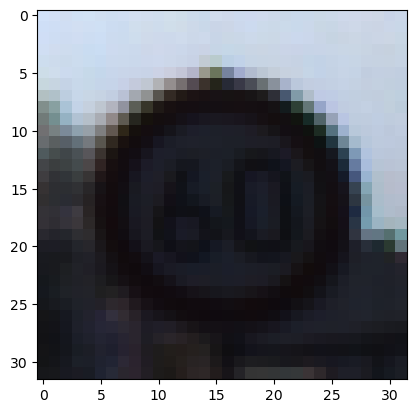

In [6]:
i = np.random.randint(1, len(X_train))        
plt.imshow(X_train[i])                        
y_train[i]                                    

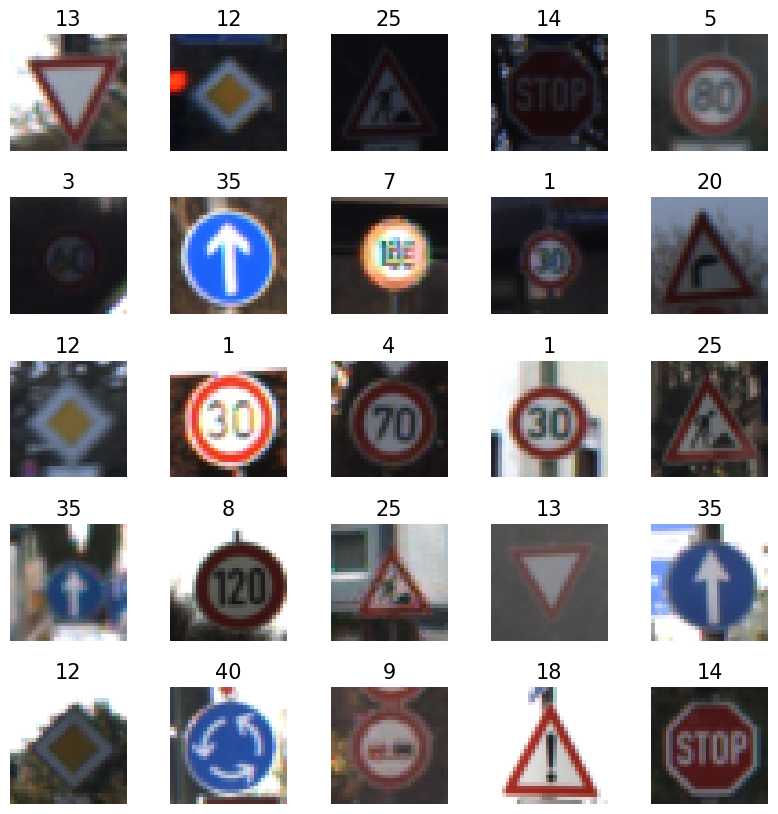

In [7]:
W_grid = 5                      
L_grid = 5          
          
fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

axes = axes.ravel()       

n_training = len(X_train)          

for i in np.arange(0, W_grid * L_grid): 

    index = np.random.randint(0, n_training)

    axes[i].imshow( X_train[index])                         
    axes[i].set_title(y_train[index], fontsize = 15)        
    axes[i].axis('off')                                     

plt.subplots_adjust(hspace=0.4)  

# Converting Images to Grayscale and performing Normalization

## **Shuffling the Training Data**

In [8]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)   

In [9]:
X_train_gray = np.sum(X_train/3, axis = 3, keepdims = True)
X_test_gray = np.sum(X_test/3, axis = 3, keepdims = True)
X_validation_gray = np.sum(X_validation/3, axis = 3, keepdims = True)

In [10]:
X_train_gray.shape


(34799, 32, 32, 1)

In [11]:
X_test_gray.shape


(12630, 32, 32, 1)

In [12]:
X_validation_gray.shape

(4410, 32, 32, 1)

In [13]:
X_train_gray_norm = (X_train_gray - 128)/128
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128

In [14]:
X_train_gray_norm

array([[[[-0.32552083],
         [-0.15885417],
         [-0.11458333],
         ...,
         [-0.16666667],
         [-0.08333333],
         [-0.08333333]],

        [[-0.42708333],
         [-0.26041667],
         [-0.1640625 ],
         ...,
         [-0.16666667],
         [-0.0859375 ],
         [-0.08333333]],

        [[-0.56510417],
         [-0.40625   ],
         [-0.30208333],
         ...,
         [-0.1640625 ],
         [-0.09375   ],
         [-0.1015625 ]],

        ...,

        [[-0.9140625 ],
         [-0.91145833],
         [-0.91145833],
         ...,
         [-0.72395833],
         [-0.79166667],
         [-0.82291667]],

        [[-0.9140625 ],
         [-0.9140625 ],
         [-0.9140625 ],
         ...,
         [-0.72135417],
         [-0.78385417],
         [-0.81770833]],

        [[-0.9140625 ],
         [-0.91145833],
         [-0.9140625 ],
         ...,
         [-0.71875   ],
         [-0.78385417],
         [-0.82291667]]],


       [[[-0.9140625 ],


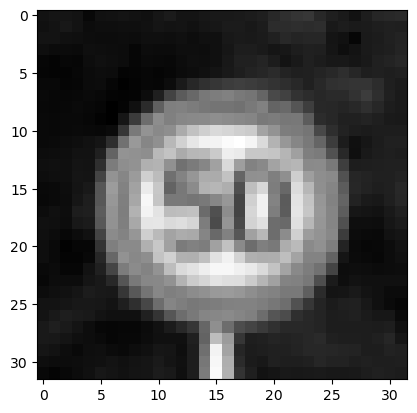

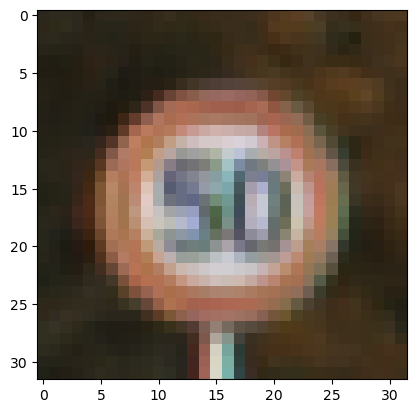

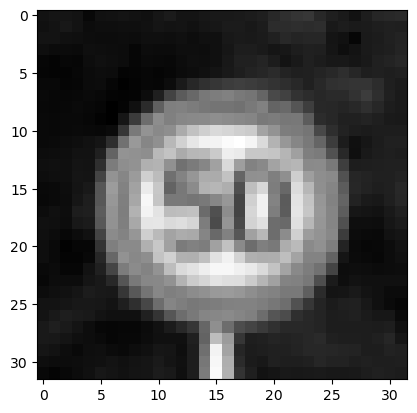

In [15]:
i = random.randint(1, len(X_train_gray))

plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')            
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')


# Building Deep CNN Model

In [16]:
from tensorflow.keras import datasets, layers, models

CNN = models.Sequential()

CNN.add(layers.Conv2D(6, (5,5), activation = 'relu', input_shape = (32,32,1)))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Dropout(0.2))

CNN.add(layers.Conv2D(16, (5,5), activation = 'relu'))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Flatten())

CNN.add(layers.Dense(120, activation = 'relu'))

CNN.add(layers.Dense(84, activation = 'relu'))

CNN.add(layers.Dense(43, activation = 'softmax'))
CNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 dropout (Dropout)           (None, 14, 14, 6)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 400)               0

# Training Deep CNN Model

In [17]:
CNN.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [18]:
history = CNN.fit(X_train_gray_norm,
                 y_train, 
                 batch_size = 500,
                 epochs = 50,
                 verbose = 1,
                 validation_data = (X_validation_gray_norm, y_validation))

Epoch 1/50
70/70 [==============================] - 13s 162ms/step - loss: 3.1776 - accuracy: 0.1760 - val_loss: 2.7731 - val_accuracy: 0.2492
Epoch 2/50
70/70 [==============================] - 12s 166ms/step - loss: 1.8688 - accuracy: 0.4811 - val_loss: 1.4453 - val_accuracy: 0.5769
Epoch 3/50
70/70 [==============================] - 12s 170ms/step - loss: 1.0625 - accuracy: 0.6872 - val_loss: 0.9610 - val_accuracy: 0.7236
Epoch 4/50
70/70 [==============================] - 12s 165ms/step - loss: 0.7693 - accuracy: 0.7732 - val_loss: 0.7920 - val_accuracy: 0.7639
Epoch 5/50
70/70 [==============================] - 11s 163ms/step - loss: 0.6239 - accuracy: 0.8171 - val_loss: 0.7197 - val_accuracy: 0.8005
Epoch 6/50
70/70 [==============================] - 11s 160ms/step - loss: 0.5206 - accuracy: 0.8489 - val_loss: 0.6474 - val_accuracy: 0.8145
Epoch 7/50
70/70 [==============================] - 12s 172ms/step - loss: 0.4524 - accuracy: 0.8689 - val_loss: 0.6055 - val_accuracy: 0.8263

# Evaluate the performance of the trained Deep CNN model.

In [19]:
score = CNN.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

395/395 [==============================] - 2s 6ms/step - loss: 0.7850 - accuracy: 0.8979
Test Accuracy: 0.8979414105415344


In [20]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [21]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

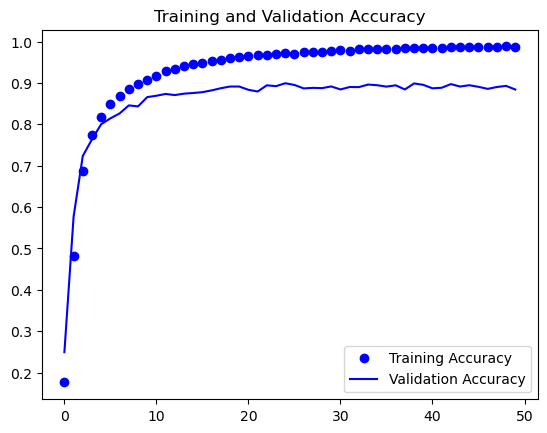

In [22]:
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

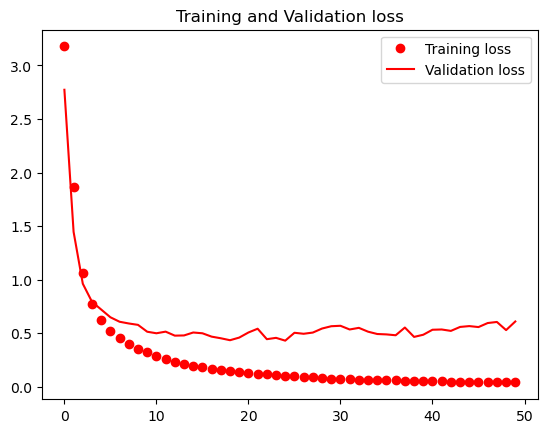

In [23]:
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

In [24]:
y_pred_prob = CNN.predict(X_test_gray_norm)

predicted_classes = np.argmax(y_pred_prob, axis=1)
y_true  = y_test

395/395 [==============================] - 2s 5ms/step


<AxesSubplot:>

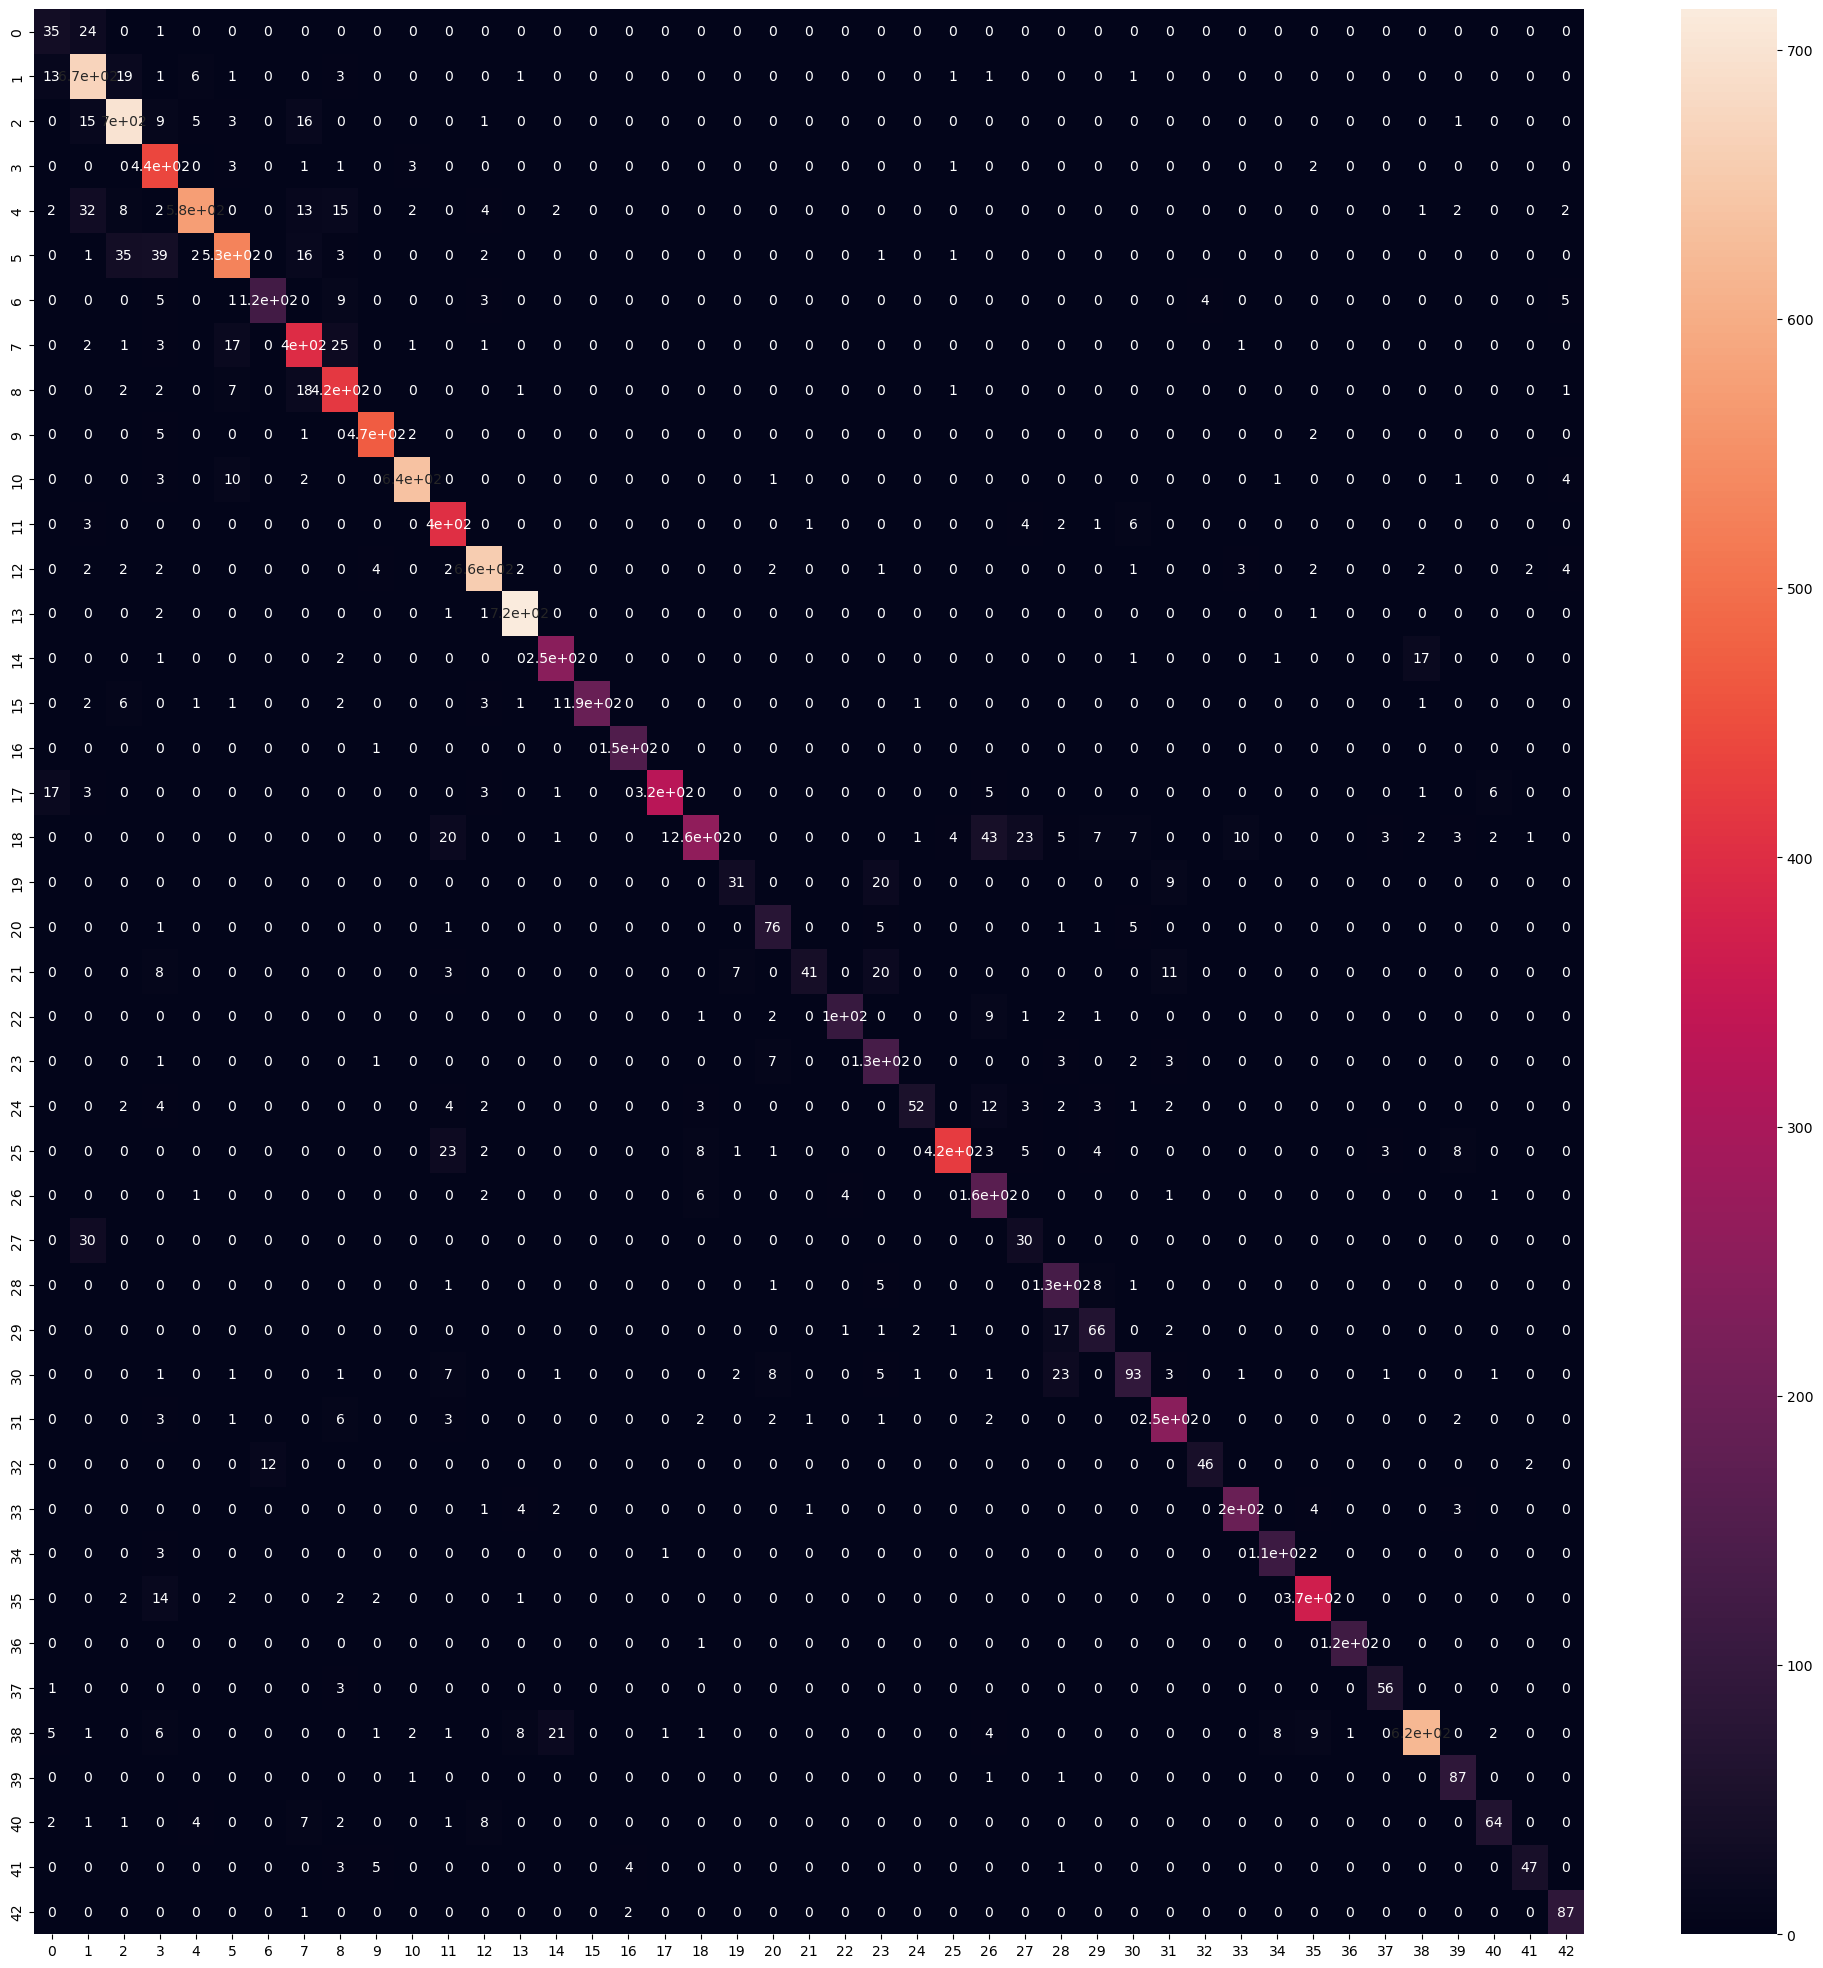

In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

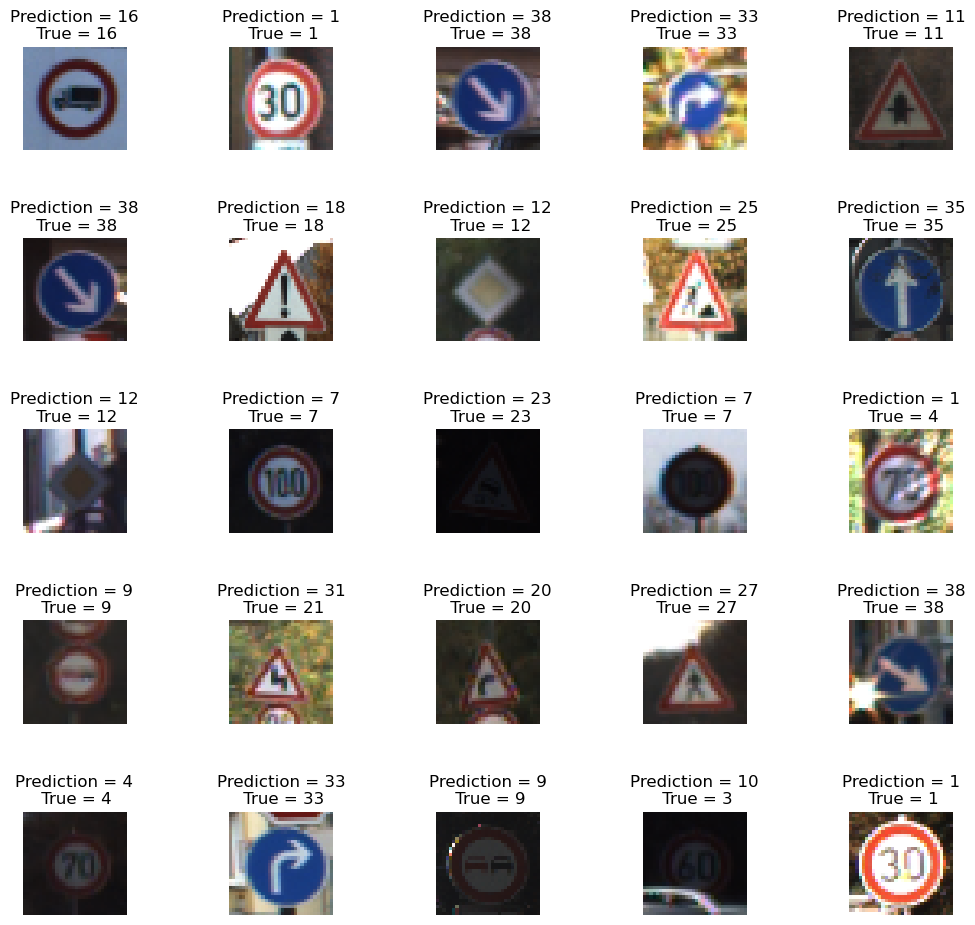

In [26]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    

# APPENDIX

- In this case study, we want to classify images of traffic signs using deep Convolutional Neural Networks (CNNs).
- The dataset consists of 43 different classes of images. 
- Classes are as listed below: 
  - 0 = Speed limit (20km/h) 
  - 1 = Speed limit (30km/h)
  - 2 = Speed limit (50km/h) 
  - 3 = Speed limit (60km/h)
  - 4 = Speed limit (70km/h) 
  - 5 = Speed limit (80km/h)
  - 6 = End of speed limit (80km/h)
  - 7 = Speed limit (100km/h)
  - 8 = Speed limit (120km/h)
  - 9 = No passing
  - 10 = No passing for vehicles over 3.5 metric tons
  - 11 = Right-of-way at the next intersection
  - 12 = Priority road
  - 13 = Yield
  - 14 = Stop
  - 15 = No vehicles
  - 16 = Vehicles over 3.5 metric tons prohibited
  - 17 = No entry
  - 18 = General caution
  - 19 = Dangerous curve to the left
  - 20 = Dangerous curve to the right
  - 21 = Double curve
  - 22 = Bumpy road
  - 23 = Slippery road
  - 24 = Road narrows on the right
  - 25 = Road work
  - 26 = Traffic signals
  - 27 = Pedestrians
  - 28 = Children crossing 
  - 29 = Bicycles crossing
  - 30 = Beware of ice/snow
  - 31 = Wild animals crossing
  - 32 = End of all speed and passing limits
  - 33 = Turn right ahead
  - 34 = Turn left ahead
  - 35 = Ahead only
  - 36 = Go straight or right
  - 37 = Go straight or left
  - 38 = Keep right
  - 39 = Keep left
  - 40 = Roundabout mandatory
  - 41 = End of no passing
  - 42 = End of no passing by vehicles over 3.5 metric tons
  